## build mask and apply on the image (use thresholding)

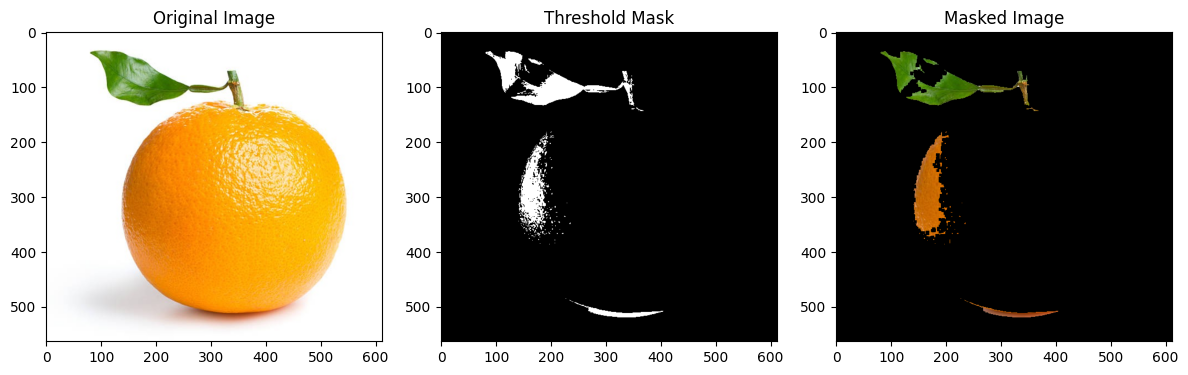

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/thkoczih.png')  # Update with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the grayscale image
# The second argument (127) is the threshold value; you can adjust this based on the image
_, threshold_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Optionally, apply morphological operations to clean up the mask
# This is useful to remove noise or fill holes in the mask
kernel = np.ones((5,5), np.uint8)
cleaned_mask = cv2.morphologyEx(threshold_mask, cv2.MORPH_CLOSE, kernel)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=cleaned_mask)

# Display the results
plt.figure(figsize=(12, 7))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(threshold_mask, cmap='gray')
plt.title('Threshold Mask')

plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')

plt.tight_layout()
plt.show()
